In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#sn.get_dataset_names()

In [3]:
#Assignment (submit by 20th Feb 2022)

# Make use of EDA to comment on the values of each feature (visualization)
# Use both outlier detection methods
# Provide your analysis about the outliers obtained
# Did you observe any difference in the two methods of outliers?

# Share your responses in the same file as comments (so that it is understandable)

# Download the JN as pdf and share in the below link:

# https://drive.google.com/drive/folders/13kfcc4biDHxx576UU8bvMTAJotPF3MNr?usp=sharing
    


In [4]:
df = sn.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.to_csv("tips.csv")

 The no. of males in dataset = 157 and no.of females in dateset = 87


Text(0, 0.5, ' % of Male and female ')

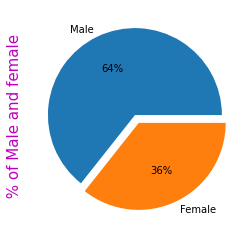

In [7]:
# The no.of males in the dataset are more than the no.of females in the dataset
gender_count =  df["sex"].value_counts()
gender_count[0]
print(" The no. of males in dataset = {} and no.of females in dateset = {}".format(gender_count[0],gender_count[1]))
ax = (df["sex"].value_counts()).plot.pie(explode=[0,0.1], labels=['Male',"Female"],autopct='%.0f%%')
ax.set_ylabel(" % of Male and female ", fontsize = 15, c = 'm')

C:\Users\barun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

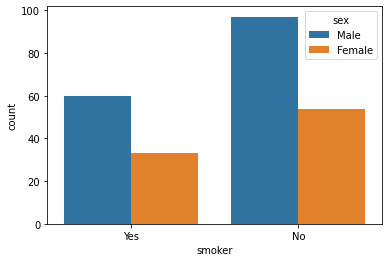

In [8]:
# The no. of smokers in the dataset are less than the no.of non-smokers.
sn.countplot(df["smoker"], hue = df['sex'])

<AxesSubplot:xlabel='day', ylabel='count'>

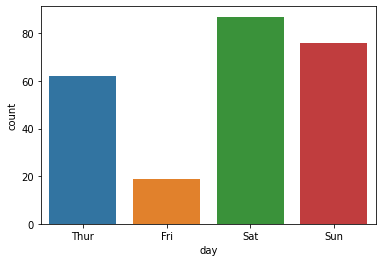

In [9]:
# The customers in the dataset prefer to dinein on weekends
sn.countplot(df["day"])

<AxesSubplot:xlabel='time', ylabel='count'>

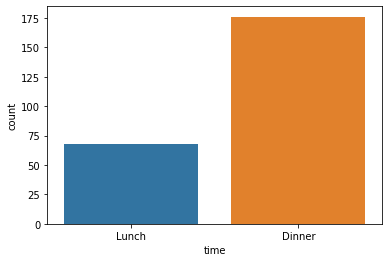

In [10]:
# The customers in the dataset prefer to dinein for dinner than lunch.
sn.countplot(df["time"])

<AxesSubplot:xlabel='size', ylabel='count'>

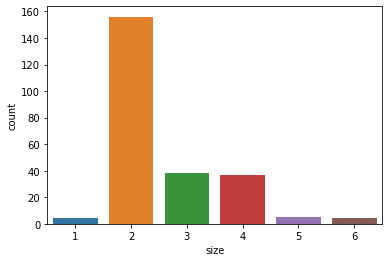

In [11]:
sn.countplot(df["size"])

In [12]:
df.describe(include = 'all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


### Data Visualization 

<AxesSubplot:ylabel='Frequency'>

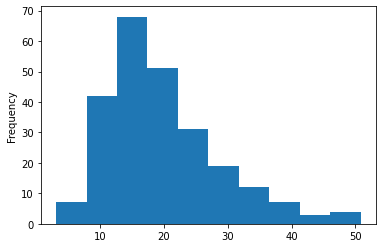

In [13]:
# From the plot, it is observed that data in total_bill feature is slightly right skewed.
#hist = sn.displot(df['total_bill'], kde=True, bins=50 ,color = "orange")
df["total_bill"].plot(kind = 'hist')

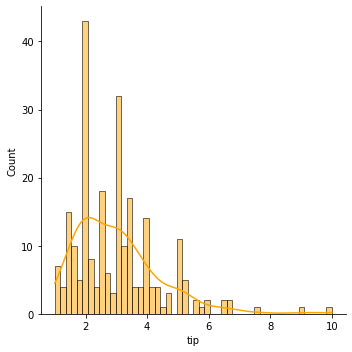

In [14]:
# From the plot, it is observed that data in tip feature is  right skewed.
hist = sn.displot(df['tip'], kde=True, bins=50 ,color = "orange")

### Detection of outliers using various methods

In [18]:
#. 1. Detection of outliers using sort method. Here sort method is used to find the outliers in the total_bill feature but 
# unable to depict clearly the exact boundaries which are to be considered as outliers.

In [19]:
df.sort_values("total_bill", ascending=True, inplace=False)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
59,48.27,6.73,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [20]:
df.sort_values("tip", ascending=True, inplace=False)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6
59,48.27,6.73,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [21]:
# 2. Detection of outliers using boxplot and scatterplot. From the boxplot, it is clearly visible that outliers can be
# found easily. From the scatter plot too, we can identify the outliers present in the dataset but boxplot is easy to
# to understand.

<AxesSubplot:xlabel='total_bill'>

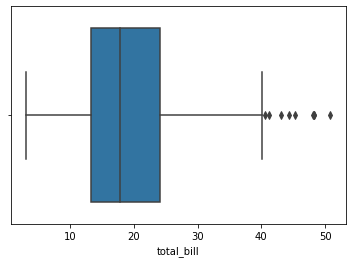

In [22]:
sn.boxplot(x = df["total_bill"])

<AxesSubplot:xlabel='tip'>

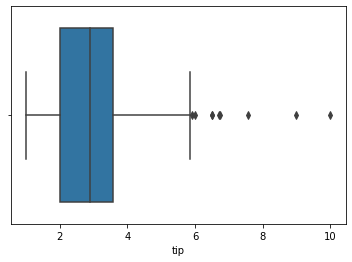

In [23]:
sn.boxplot(x = df["tip"])

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

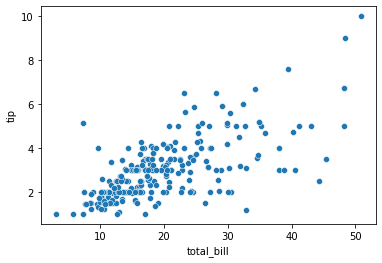

In [24]:
sn.scatterplot( x = df["total_bill"] , y = df['tip'])

In [25]:
#3. Dectection of outliers using IQR method. 
# From the above, it is observed that data in total_bill and tip features are right-skewed. with the help of IQR method, the 
# outliers in the data are found.

In [26]:
list_column = ["total_bill","tip"]
for col in list_column:
    print(" Outliers in {} feature of dataset using IQR method :".format(col))
    sort_data = np.sort(df[col])
    Q1 = np.percentile(df[col], 25, interpolation = 'midpoint') 
    Q2 = np.percentile(df[col], 50, interpolation = 'midpoint') 
    Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
    IQR = Q3-Q1
    print(' 25 percentile of the given data is {:.3f} '.format(Q1))
    print(' 50 percentile of the given data is {:.3f} '.format(Q2))
    print(' 75 percentile of the given data is {:.3f} '.format(Q3))
    print(" Inter Quartile range is : {:.3f}" .format(IQR))
    lower_limit = Q1 - 1.5*(IQR)
    upper_limit = Q3 + 1.5*(IQR)
    print(" Lower limit is {:.3f} ".format(lower_limit))
    print(" upper limit is {:.3f} ".format(upper_limit))
    outlier_IQR = []
    for i in df[col]:
        if i < lower_limit or i > upper_limit:
            outlier_IQR.append(i)
    outlier_IQR.sort()        
    print(" The outliers in the feature using IQR method:  ", outlier_IQR,"\n")

 Outliers in total_bill feature of dataset using IQR method :
 25 percentile of the given data is 13.325 
 50 percentile of the given data is 17.795 
 75 percentile of the given data is 24.175 
 Inter Quartile range is : 10.850
 Lower limit is -2.950 
 upper limit is 40.450 
 The outliers in the feature using IQR method:   [40.55, 41.19, 43.11, 44.3, 45.35, 48.17, 48.27, 48.33, 50.81] 

 Outliers in tip feature of dataset using IQR method :
 25 percentile of the given data is 2.000 
 50 percentile of the given data is 2.900 
 75 percentile of the given data is 3.575 
 Inter Quartile range is : 1.575
 Lower limit is -0.363 
 upper limit is 5.938 
 The outliers in the feature using IQR method:   [6.0, 6.5, 6.5, 6.7, 6.73, 7.58, 9.0, 10.0] 



In [27]:
#4. Detection of outliers using Z-score method.
# with Z-Score method, the outliers in the dataset are found.

In [28]:
list_column = ["total_bill","tip"]
for col in list_column:
    print("Outliers in {} feature of dataset using Z-score method :".format(col))
    mean = np.mean(df[col])
    std = np.std(df[col])
    print('mean of the dataset is {:.3f}'.format(mean))
    print('std. deviation is {:.3f}'.format(std))
    outlier_Z = []
    for i in df[col]:
        z = (i - mean)/std
        if  z<-3 or z > 3:
            outlier_Z.append(i)
        outlier_Z.sort()
    print("The outliers in the feature using Z-score method :", outlier_Z,"\n") 

Outliers in total_bill feature of dataset using Z-score method :
mean of the dataset is 19.786
std. deviation is 8.884
The outliers in the feature using Z-score method : [48.17, 48.27, 48.33, 50.81] 

Outliers in tip feature of dataset using Z-score method :
mean of the dataset is 2.998
std. deviation is 1.381
The outliers in the feature using Z-score method : [7.58, 9.0, 10.0] 



In [29]:
# Inorder to evaluate the best method to find outliers, choosing only total_bill feature for evaluation
sort_data = np.sort(df["total_bill"])
Q1 = np.percentile(df["total_bill"], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df["total_bill"], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df["total_bill"], 75, interpolation = 'midpoint')
IQR = Q3-Q1
print(" The outliers in total_bill feature :")
print(' 25 percentile of the given data is {:.3f} '.format(Q1))
print(' 50 percentile of the given data is {:.3f} '.format(Q2))
print(' 75 percentile of the given data is {:.3f} '.format(Q3))
print(" Inter Quartile range is : {:.3f}" .format(IQR))
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
print(" Lower limit is {:.3f} ".format(lower_limit))
print(" upper limit is {:.3f} ".format(upper_limit))
outlier_IQR = []
for i in df["total_bill"]:
    if i < lower_limit or i > upper_limit:
        outlier_IQR.append(i)
outlier_IQR.sort()        
print(" The outliers in the feature using IQR method: ", outlier_IQR)

 The outliers in total_bill feature :
 25 percentile of the given data is 13.325 
 50 percentile of the given data is 17.795 
 75 percentile of the given data is 24.175 
 Inter Quartile range is : 10.850
 Lower limit is -2.950 
 upper limit is 40.450 
 The outliers in the feature using IQR method:  [40.55, 41.19, 43.11, 44.3, 45.35, 48.17, 48.27, 48.33, 50.81]


In [30]:
# Creating a dataframe df_IQR removing the outliers obtained by IQR method in the dataset
df_IQR = df[(df["total_bill"] <= upper_limit) & (df['total_bill'] >= lower_limit)]
df_IQR.count()

total_bill    235
tip           235
sex           235
smoker        235
day           235
time          235
size          235
dtype: int64

In [31]:
# Creating a dataframe df_Z removing the outliers obtained by Z-score method in the dataset
df["Z-score"] = (df["total_bill"]-df["total_bill"].mean())/df["total_bill"].std()
df_Z  = df[(df["Z-score"] > -3)  & (df["Z-score"] < 3)]
df_Z.count()

total_bill    240
tip           240
sex           240
smoker        240
day           240
time          240
size          240
Z-score       240
dtype: int64

Basic dataset - skewness :1.133, kurtosis:1.218 
Using IQR method - skewness :0.726, kurtosis:0.051 
Using Z-score method - skewness :0.915, kurtosis:0.536 


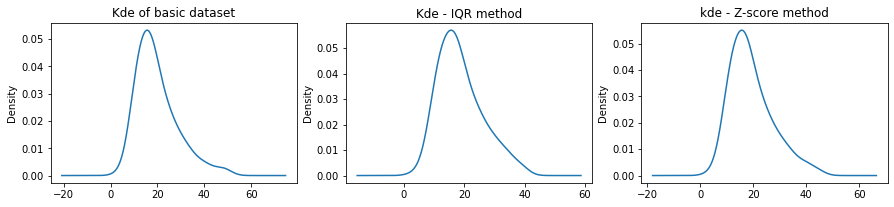

In [32]:
# Plotted kde plots for feature total_bill, total_bill after removing outliers using IQR method, total_bill after removing out
#-liers using Z_Score method.
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
df["total_bill"].plot(kind = 'kde', title ="Kde of basic dataset")
plt.subplot(3,3,2)
df_IQR["total_bill"].plot(kind = 'kde',title="Kde - IQR method")
plt.subplot(3,3,3)
df_Z["total_bill"].plot(kind = 'kde',title ="kde - Z-score method")
print("Basic dataset - skewness :{:.3f}, kurtosis:{:.3f} ".format(df["total_bill"].skew(),df["total_bill"].kurt()))
print("Using IQR method - skewness :{:.3f}, kurtosis:{:.3f} ".format(df_IQR["total_bill"].skew(),df_IQR["total_bill"].kurt()))
print("Using Z-score method - skewness :{:.3f}, kurtosis:{:.3f} ".format(df_Z["total_bill"].skew(),df_Z["total_bill"].kurt()))

In [33]:
# From the EDA, from finding outliers using various methods to Kde plots, it is observed that boxplot and IQR methods are best 
# suitable for finding outliers if the data is skewed. It is also observed that, since Z-score method is preferable for normal
# distribution, applying the z-score method to skewed data led to account some of the outliers into valid dataset. This led to 
# high skewness and kurtosis. IQR method gives the best outliers than Z-score which can be seen from above values of skewness
# and kurtosis which are low.

In [34]:
# to find the relation between the features
df.corr()

,total_bill,tip,size,Z-score
total_bill,1.000000,0.675734,0.598315,1.000000
tip,0.675734,1.000000,0.489299,0.675734
size,0.598315,0.489299,1.000000,0.598315
Z-score,1.000000,0.675734,0.598315,1.000000


<AxesSubplot:>

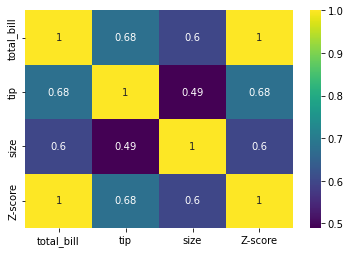

In [35]:
#. From the heatmap, it can be concluded that total_bill and tip features in the dataset are postively correlated and 
#  the value of correlation coefficient is 0.68
sn.heatmap(df.corr(), annot = True, cmap = 'viridis')